# Lista 1

Zadanie 1

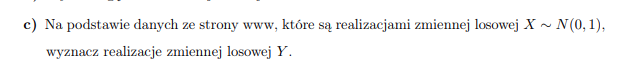

In [9]:
import numpy as np
data = open("danelista1.txt").read().split()
xs = []
for x in data:
    for i in range(len(x)):
        if x[i] == "e":
            xs.append(float(x[:i])*10**(int(x[i+1:])))
ys = [np.exp(x) for x in xs]
print(ys)

[0.3354040682901751, 0.3053437157518898, 1.4026558566827236, 4.635565045491512, 1.4590678457476107, 2.5940749005116475, 0.6125385008549967, 1.3682904172763726, 0.7681233705488524, 0.45285543611701806, 2.1045367044237224, 0.7553636198329009, 0.04007759616208671, 6.922446170413314, 0.7417389923716398, 1.4666505301131476, 0.6348366927098249, 1.1693630513332511, 0.7700775691903609, 0.9404018876820703, 0.6473324780764358, 0.33165311189005564, 0.6320529036700123, 1.3420158376400377, 0.8230185327737328, 4.941517646947798, 22.097005464523196, 0.46963675255400766, 0.4179653435759484, 0.3488927536976749, 0.3769662530488757, 0.8939475718422798, 1.4125867385837825, 1.167516251058234, 0.270673413791, 4.598415097020011, 2.6081284887250606, 0.3730017565873301, 0.7888419934329644, 0.6152115848115156, 0.940669048661079, 0.5273359854694787, 0.4890339081946277, 1.1989113779369294, 0.7388987403151435, 0.9978282539603343, 0.7036174749101447, 0.8651349782536659, 1.2387110832211932, 0.5198878467477738, 3.997

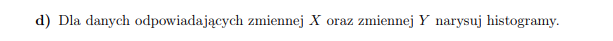

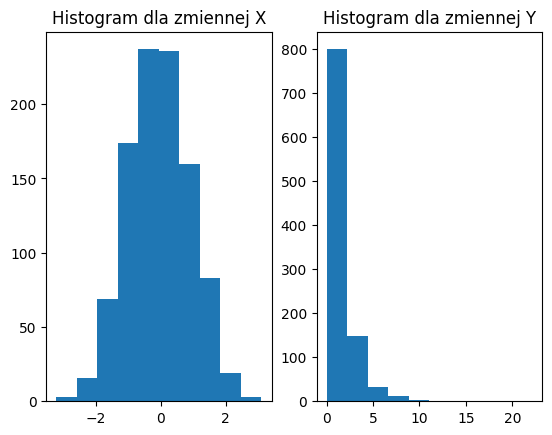

In [14]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,2)

axis[0].hist(xs)
axis[0].set_title("Histogram dla zmiennej X")

axis[1].hist(ys)
axis[1].set_title("Histogram dla zmiennej Y")
plt.show()

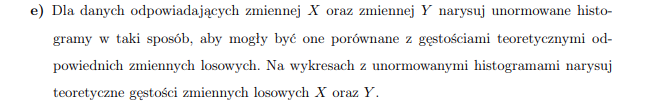

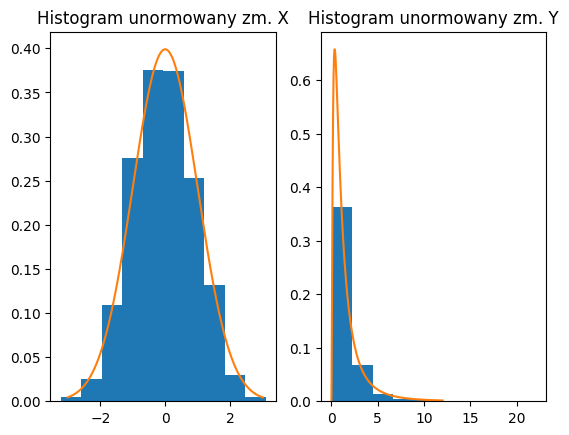

In [36]:
from scipy.stats import norm, lognorm, pareto

fig, axis = plt.subplots(1,2)

xs1 = np.linspace(-3,3,1000)
xs2 = np.linspace(0,12,1000)

axis[0].hist(xs, density=True)
axis[0].plot(xs1, norm.pdf(xs1))
axis[0].set_title("Histogram unormowany zm. X")

axis[1].hist(ys, density=True)
axis[1].plot(xs2, lognorm.pdf(xs2, 1))
axis[1].set_title("Histogram unormowany zm. Y")
plt.show()

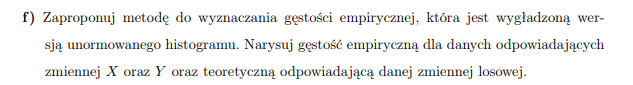

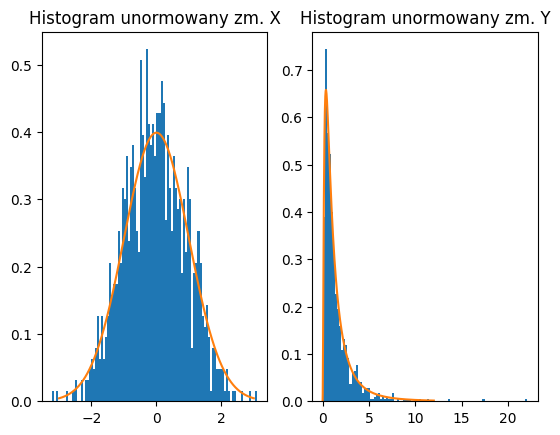

In [30]:

fig, axis = plt.subplots(1,2)

xs1 = np.linspace(-3,3,1000)
xs2 = np.linspace(0,12,1000)

axis[0].hist(xs, density=True, bins=100)
axis[0].plot(xs1, norm.pdf(xs1))
axis[0].set_title("Histogram unormowany zm. X")

axis[1].hist(ys, density=True, bins=100)
axis[1].plot(xs2, lognorm.pdf(xs2, 1))
axis[1].set_title("Histogram unormowany zm. Y")
plt.show()

Zadanie 2

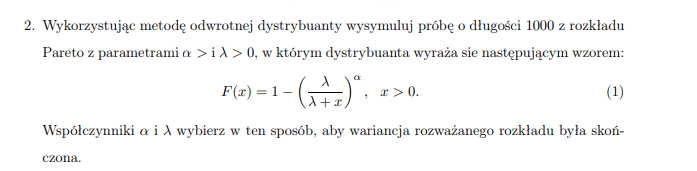

Wiemy, że dystrybunata rozkładu Pareto wyraża się wzorem
$$
U = F(x) = 1 - \left( \frac{\lambda}{\lambda + x} \right)^{\alpha}
$$
A zatem po odwróceniu dystrybunaty dostajemy
$$
F^{-1}(U) = \lambda \left( \frac{1}{\sqrt[\alpha]{1-U}} -1 \right)
$$
Przyjmijmy współczynniki $\lambda = 1 $ i $\alpha = 2$, a zatem odwrócona dystrybuanta jest dana wzorem
$$
F^{-1}(U) = \left( \frac{1}{\sqrt{1-U}} -1 \right)
$$

In [31]:
import random
def pareto_simulation(sample, alpha = 2, lambd = 1):
    us = []
    for i in range(sample):
        us.append(random.random())
    return [lambd * ((1-u)**(-1/alpha) - 1) for u in us]

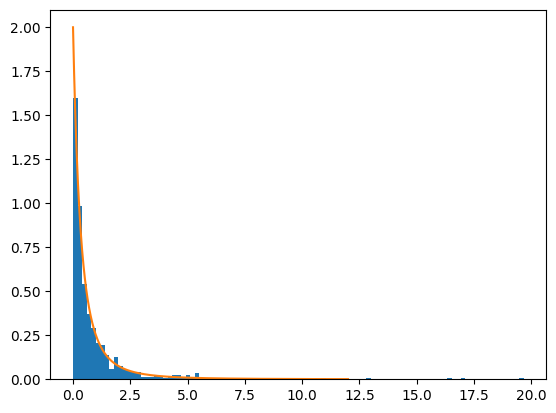

In [97]:
simul = pareto_simulation(1000)
plt.hist(simul, bins=100, density=True)
plt.plot(xs2, pareto.pdf(xs2, 2, loc=-1))
plt.show()

Zadanie 3

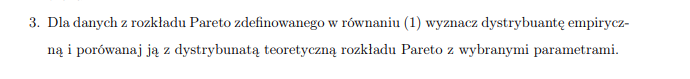

Text(0.5, 1.0, 'Dystrybuanta rozkładu Pareto')

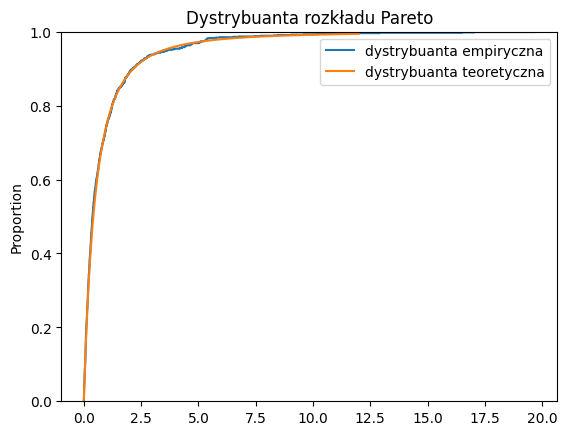

In [99]:
import seaborn as sns
sns.ecdfplot(data=simul, label="dystrybuanta empiryczna")
plt.plot(xs2, pareto.cdf(xs2, 2, loc=-1,scale=1), label='dystrybuanta teoretyczna')
plt.legend(loc="best")
plt.title("Dystrybuanta rozkładu Pareto")

Zadanie 4


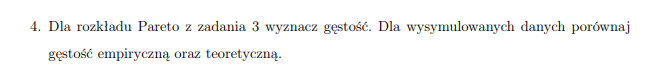

Wiemy, że dystrybunata rozkładu Pareto wyraża się wzorem
$$
U = F(x) = 1 - \left( \frac{\lambda}{\lambda + x} \right)^{\alpha}
$$
A zatem możemy zapisać
$$
f(x) = F'(x) = \frac{d}{dx} \left( 1 - \left( \frac{\lambda}{\lambda + x} \right)^{\alpha} \right) = -\lambda^{\alpha} \frac{d}{dx} \left( (x+\lambda)^{-\alpha} \right) = \lambda^{\alpha} \alpha \left(x+\lambda\right)^{-\alpha - 1} = \frac{\lambda^{\alpha} \alpha}{\left(x+\lambda\right)^{\alpha + 1}}
$$

Dla $\lambda = 1 $ i $\alpha = 3$

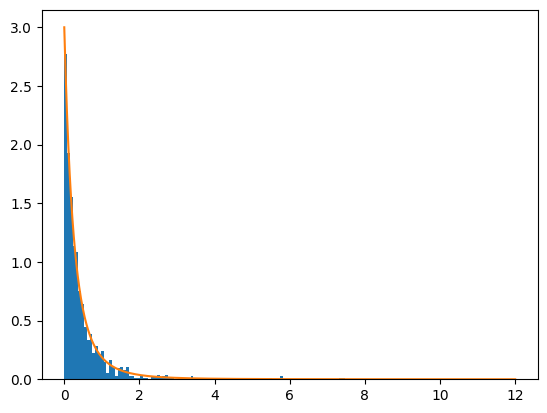

In [64]:
simul1 = pareto_simulation(1000,3,1)
plt.hist(simul1, bins=100, density=True)
plt.plot(xs2, pareto.pdf(xs2, 3, loc = -1, scale = 1))
plt.show()

Dla $\lambda = 2 $ i $\alpha = 6$

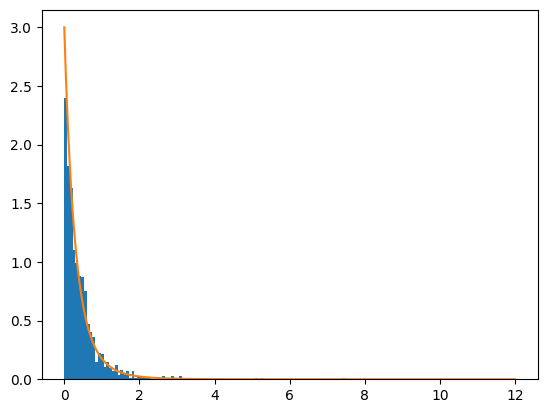

In [65]:
simul2 = pareto_simulation(1000,6,2)
plt.hist(simul2, bins=100, density=True)
plt.plot(xs2, pareto.pdf(xs2, b=6, loc = -2, scale = 2))
plt.show()

Dla $\lambda = 3 $ i $\alpha = 2$

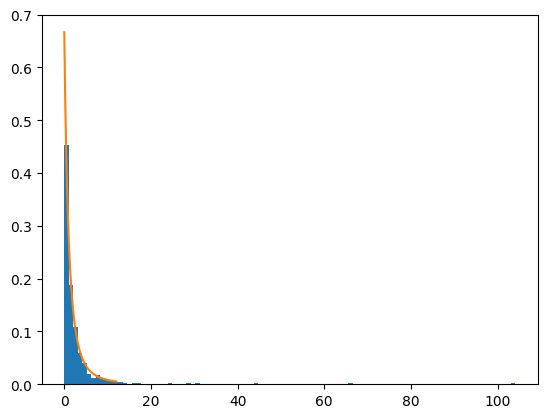

In [67]:
simul3 = pareto_simulation(1000,2,3)
plt.hist(simul3, bins=100, density=True)
plt.plot(xs2, pareto.pdf(xs2, b=2, loc = -3, scale = 3))
plt.show()

Zadanie 5

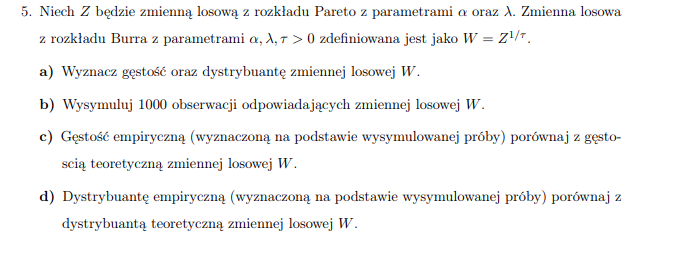

In [101]:
def burr_simulation(sample, r = 1, alpha = 2, lambd = 1):
    us = []
    for i in range(sample):
        us.append(random.random())
    return [(lambd * ((1-u)**(-1/alpha) - 1))**(1/r) for u in us]

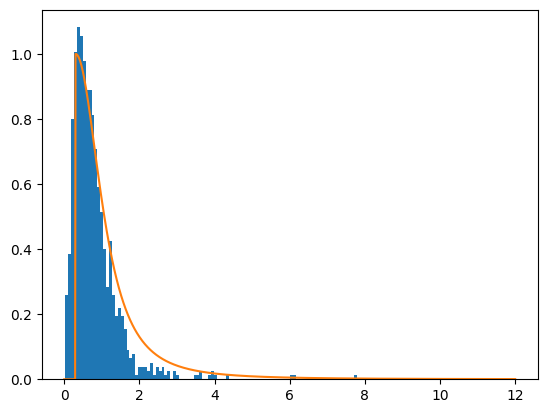

In [127]:
from scipy.stats import burr
simul_burr = burr_simulation(1000, 2) #symulowanie 1000 obserwacji
plt.hist(simul_burr, bins=100, density=True)
plt.plot(xs2, burr.pdf(xs2, c=2, d=0.5, loc = 0.3, scale=1))
plt.show()

Text(0.5, 1.0, 'Dystrybuanta rozkładu Pareto')

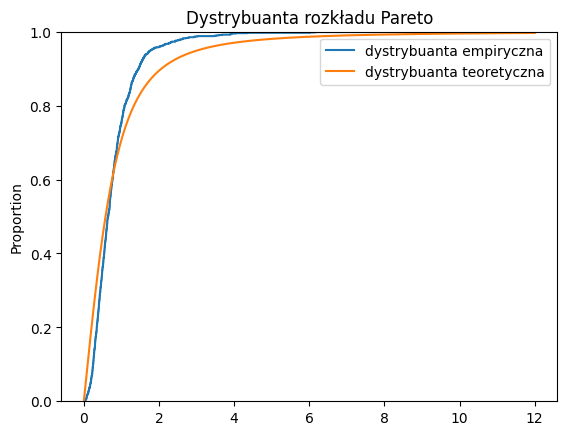

In [138]:
sns.ecdfplot(data=simul_burr, label="dystrybuanta empiryczna")
plt.plot(xs2, burr.cdf(xs2, c=2, d=0.5, loc = 0, scale=1), label='dystrybuanta teoretyczna')
plt.legend(loc="best")
plt.title("Dystrybuanta rozkładu Burra")